<font size="5">Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science\
No liability or warranty; only for educational and non-commercial purposes\
See some basic hints for working with Jupyter notebooks in README.md</font>

<font size="6">Data Structure Priority Queue with Statistics</font>

<font size="6">Data Structure for storing Keys with their respective Priorities</font>

In [1]:
class Node:
    def __init__(self, name_input, prio_input):
        self.name = name_input
        self.prio = prio_input

<font size="6">Storage for Elements of Priority Queue</font>

In [2]:
# Heap
ELEMENTS = []
HEAPSIZE = 0
# non-Heap
NONHEAP_ELEMENTS = []
NONHEAP_SIZE = 0

<font size="6">Helper Functions for easier access to Children/Parents of a given Element in Heap</font>

In [3]:
def parent(i):
    return (i-1)//2 # "//" means division with floor function (round down)

def left(i):
    return 2*i +1

def right(i):
    return 2*i +2

<font size="6">Keeping Count of Statistics</font>

In [4]:
# Statistics for Heap Implementation
AMT_KEY_COMPARISONS = 0
KEY_COMPARISONS_PER_OPERATION = []
# Statistics for Array implementation not using the Heap Data Structure 
NONHEAP_AMT_KEY_COMPARISONS = 0
NONHEAP_KEY_COMPARISONS_PER_OPERATION = []
# Keeping Track of Indices to highlight
EXTRACTION_INDICES, REDUCTION_INDICES = [], []
# Averaging
NONHEAP_AVG_COMPARISONS_PER_OPERATION = [], []
AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION = [], []

<font size="6">Colors for Visualization</font>

In [5]:
COL_HEAP = 'tomato'
COL_NONHEAP = 'tab:blue'
COL_EXTRACTION = 'forestgreen'
COL_REDUCTION = 'tab:pink'

<font size="6">Function to calculate the Average per Operation</font>

In [6]:
def calculate_average():
    global AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION
    for i,amt in enumerate(KEY_COMPARISONS_PER_OPERATION):
         AVG_COMPARISONS_PER_OPERATION.append(amt/(i+1))   
    for i,amt in enumerate(NONHEAP_KEY_COMPARISONS_PER_OPERATION):
         NONHEAP_AVG_COMPARISONS_PER_OPERATION.append(amt/(i+1))

<font size="6">Function to reset Priority Queue</font>

In [7]:
def reset_pq():
    global ELEMENTS, HEAPSIZE, NONHEAP_ELEMENTS, NONHEAP_SIZE
    global AMT_KEY_COMPARISONS, NONHEAP_AMT_KEY_COMPARISONS, KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION
    global AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION
    global EXTRACTION_INDICES, REDUCTION_INDICES
    # For the Implementation
    ELEMENTS, HEAPSIZE = [], 0
    NONHEAP_ELEMENTS, NONHEAP_SIZE = [], 0
    # Counting Comparisons
    AMT_KEY_COMPARISONS, NONHEAP_AMT_KEY_COMPARISONS = 0, 0
    KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION = [], []
    # Averaging the outcome
    AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION = [], []
    # Keeping Track at which point an extraction or reduction is occuring as opposed to insertions (for visualization)
    EXTRACTION_INDICES, REDUCTION_INDICES = [], []

<font size="6">Implementation of a Priority Queue (Statistics)</font>

In [8]:
def insert_key(name_input, prio_input):
    global ELEMENTS, HEAPSIZE
    ELEMENTS.append(Node(name_input, float('inf'))) # float('inf') = positive infinity
    heap_decrease_key(HEAPSIZE, prio_input)
    HEAPSIZE += 1   
            
def heap_decrease_key(i, prio_input):
    global ELEMENTS
    global AMT_KEY_COMPARISONS      
    ELEMENTS[i].prio = prio_input
    while i > 0 and ELEMENTS[parent(i)].prio > ELEMENTS[i].prio:
        AMT_KEY_COMPARISONS += 1
        ELEMENTS[i], ELEMENTS[parent(i)] = ELEMENTS[parent(i)], ELEMENTS[i]
        i = parent(i)
    if i != 0: # in case that it is not appended, it also checks the prio of the Element smaller than itself
        AMT_KEY_COMPARISONS += 1
        
def extract_min():
    global ELEMENTS, HEAPSIZE
    global AMT_KEY_COMPARISONS    
    min_element = ELEMENTS[0]
    HEAPSIZE -= 1
    ELEMENTS[0], ELEMENTS[HEAPSIZE] = ELEMENTS[HEAPSIZE], ELEMENTS[0] # Swaps first Element and last Element to delete the previous first and bubble down the previous last
    ELEMENTS = ELEMENTS[:HEAPSIZE] # Deletes last Element
    min_heapify(0)
        
def min_heapify(i):
    global ELEMENTS, HEAPSIZE
    global AMT_KEY_COMPARISONS
    l = left(i)
    r = right(i)   
    if l < HEAPSIZE and ELEMENTS[l].prio < ELEMENTS[i].prio:
        minimum = l
        AMT_KEY_COMPARISONS += 1
    else:
        minimum = i
        AMT_KEY_COMPARISONS += 1
    if r < HEAPSIZE and ELEMENTS[r].prio < ELEMENTS[minimum].prio:
        minimum = r
    if r < HEAPSIZE: # Key Comparison only happens when the Index is not already out of range
        AMT_KEY_COMPARISONS += 1
    if minimum != i: # Index Comparison. not a key comparison
        ELEMENTS[i], ELEMENTS[minimum] = ELEMENTS[minimum], ELEMENTS[i]
        min_heapify(minimum)
    
def reduce_priority(name_input, new_prio):
    global ELEMENTS   
    key_found = False  
    for index, element in enumerate(ELEMENTS):
        if element.name == name_input:
            key_found = True
            at_index = index
            break          
    if not key_found:
        return
    heap_decrease_key(at_index,new_prio)

<font size="6">Implementation of a Priority Queue not using a Heap Structure (Statistics)</font>

In [9]:
def nonheap_insert_key(name_input, prio_input):
    global NONHEAP_ELEMENTS, NONHEAP_SIZE
    global NONHEAP_AMT_KEY_COMPARISONS
    name_already_exists = False
    for element in NONHEAP_ELEMENTS:
        if element.name == name_input:
            name_already_exists = True
    if not name_already_exists:
        i = 0
        if NONHEAP_SIZE == 0:
            NONHEAP_ELEMENTS.append(Node(name_input, prio_input))
            NONHEAP_SIZE += 1
            return
        while i < NONHEAP_SIZE and NONHEAP_ELEMENTS[i].prio < prio_input:
            NONHEAP_AMT_KEY_COMPARISONS += 1
            i += 1
                
        if i < NONHEAP_SIZE: # in case that it is not appended, it also checks the prio of the Element bigger than itself
            NONHEAP_AMT_KEY_COMPARISONS += 1        
        NONHEAP_ELEMENTS.insert(i,Node(name_input, prio_input))
        NONHEAP_SIZE += 1
            
def nonheap_reduce_priority(name_input, new_prio):
    global NONHEAP_ELEMENTS   
    key_found = False  
    for index, element in enumerate(NONHEAP_ELEMENTS):
        if element.name == name_input:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        return     
    if NONHEAP_ELEMENTS[at_index].prio <= new_prio: 
        return
    nonheap_adjust_priority(at_index, new_prio)
    
def nonheap_adjust_priority(at_index, new_prio):
    global NONHEAP_ELEMENTS, NONHEAP_SIZE
    global NONHEAP_AMT_KEY_COMPARISONS
    temp = NONHEAP_ELEMENTS[at_index]
    temp.prio = new_prio
    del NONHEAP_ELEMENTS[at_index] # deletes temp from Array
    NONHEAP_SIZE -= 1
    i = 0
    if NONHEAP_SIZE == 0:
        NONHEAP_ELEMENTS.append(Node(temp.name, temp.prio))
        NONHEAP_SIZE += 1
    while i < NONHEAP_SIZE and NONHEAP_ELEMENTS[i].prio < new_prio:
        i += 1
        NONHEAP_AMT_KEY_COMPARISONS += 1
    if i == NONHEAP_SIZE: # in case it is appended, there isnt one more check
        NONHEAP_AMT_KEY_COMPARISONS += 1 # checks once more than it executes
    NONHEAP_ELEMENTS.insert(i,Node(temp.name, temp.prio))
    NONHEAP_SIZE += 1
    
def nonheap_extract_min():
    global NONHEAP_ELEMENTS, NONHEAP_SIZE
    if NONHEAP_SIZE < 1:
        return
    min_element = NONHEAP_ELEMENTS[0]
    NONHEAP_ELEMENTS = NONHEAP_ELEMENTS[1:]
    NONHEAP_SIZE -= 1

<font size="6">Functions which call both Implementations so that they may be compared on equal Inputs</font>

In [10]:
import random

def stat_reduce_priority():
    # Choosing which Element to reduce to what new Priority (Random)
    to_be_reduced = ELEMENTS[random.randint(0, len(ELEMENTS)-1)]
    lowerlimit = 0
    upperlimit = to_be_reduced.prio - 1
    if lowerlimit >= upperlimit: # Example: Something is reduced twice: Once from 1 to 0 and then once again. Since it has to decrease, it must become negative
        lowerlimit = upperlimit - 1 # makes sure that there is always a valid range of options for the random integer function
    reduced_to = random.randrange(lowerlimit, upperlimit)
    # Now the operation itself
    reduce_priority(to_be_reduced.name, reduced_to)
    nonheap_reduce_priority(to_be_reduced.name, reduced_to)
    KEY_COMPARISONS_PER_OPERATION.append(AMT_KEY_COMPARISONS)
    NONHEAP_KEY_COMPARISONS_PER_OPERATION.append(NONHEAP_AMT_KEY_COMPARISONS) 

def stat_insert_key(name_input, prio_input):
    insert_key(name_input, prio_input)
    nonheap_insert_key(name_input, prio_input)
    KEY_COMPARISONS_PER_OPERATION.append(AMT_KEY_COMPARISONS)
    NONHEAP_KEY_COMPARISONS_PER_OPERATION.append(NONHEAP_AMT_KEY_COMPARISONS)

def stat_extract_min():
    extract_min()
    nonheap_extract_min()
    KEY_COMPARISONS_PER_OPERATION.append(AMT_KEY_COMPARISONS)
    NONHEAP_KEY_COMPARISONS_PER_OPERATION.append(NONHEAP_AMT_KEY_COMPARISONS)  

<font size="6">Function that takes Data as Input and produces a graphical Output</font>

In [11]:
import matplotlib.pyplot as plt

def visualize(total_operation_indices, heapdata, nonheapdata, labelstrings, overall_average = False):   

    plt.figure(figsize=(20, 12))
    # Heap Data
    plt.plot(total_operation_indices, heapdata, color=COL_HEAP, label = 'Heap', linewidth=5.0)
    plt.scatter(total_operation_indices, heapdata, color=COL_HEAP, s=150)
    # non-Heap Data
    plt.plot(total_operation_indices, nonheapdata, color=COL_NONHEAP, label = 'non-Heap', linewidth=5.0)
    plt.scatter(total_operation_indices, nonheapdata, color=COL_NONHEAP, s=150)
    # Extraction Data 
    if EXTRACTION_INDICES:
        heap_extraction_values_at_indices = []
        lin_extraction_values_at_indices = []
        for j in EXTRACTION_INDICES:
            heap_extraction_values_at_indices.append(heapdata[j-1]) # j - 1 since EXTRACTION_INDICES start at 1 while regular indices start at 0
            lin_extraction_values_at_indices.append(nonheapdata[j-1])
        plt.scatter(EXTRACTION_INDICES, heap_extraction_values_at_indices, color=COL_EXTRACTION, label='Extractions', s=300, zorder=4)
        plt.scatter(EXTRACTION_INDICES, lin_extraction_values_at_indices, color=COL_EXTRACTION, s=300, zorder=4) # zorder=10 makes those scatter points be at the foreground
    # Reduction Data
    if REDUCTION_INDICES:
        heap_reduction_values_at_indices = []
        lin_reduction_values_at_indices = []
        for j in REDUCTION_INDICES:
            heap_reduction_values_at_indices.append(heapdata[j-1]) # j - 1 since REDUCTION_INDICES start at 1 while regular indices start at 0
            lin_reduction_values_at_indices.append(nonheapdata[j-1])
        plt.scatter(REDUCTION_INDICES, heap_reduction_values_at_indices, color=COL_REDUCTION, label='Reductions', s=300, zorder=4)
        plt.scatter(REDUCTION_INDICES, lin_reduction_values_at_indices, color=COL_REDUCTION, s=300, zorder=4) 
    # Tick fontsize
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    # Title and Axes lables
    plt.title(labelstrings[0], fontsize=25)   
    if overall_average: # in case you want to show the "average of the averages" in a single number
        sumofheapdata = 0
        for num in heapdata:
            sumofheapdata += num
        avg_heap = AMT_KEY_COMPARISONS / len(heapdata)
        sumofnonheapdata = 0
        for num in nonheapdata:
            sumofnonheapdata += num
        avg_nonheap = NONHEAP_AMT_KEY_COMPARISONS / len(nonheapdata)
        if avg_heap < avg_nonheap:
            betterone = "Heap"
            advantageinpercent = round(((avg_heap / avg_nonheap * 100) -100)*-1, 2)
        else:
            betterone = "non-Heap"
            advantageinpercent = round(((avg_nonheap / avg_heap * 100) -100)*-1, 2) 
        plt.xlabel(labelstrings[1] + "\nOverall Average: " + str(round(avg_heap, 2)) + " for Heap and " + str(round(avg_nonheap, 2)) 
                   + " for non-Heap per Operation for " + str(len(heapdata)) + " Operations" + "\n" + betterone + " is " + str(advantageinpercent) + "% cheaper (better)", fontsize=20)
    else:
        plt.xlabel(labelstrings[1], fontsize=20)
    plt.ylabel(labelstrings[2], fontsize=20)
    plt.grid(True) # Figured it'd be better with grid on
    plt.legend(fontsize=30)
    plt.show()

<font size="6">Worst Case for non-Heap Implementation, BC for Heap (Inserting in Ascending Order)</font>

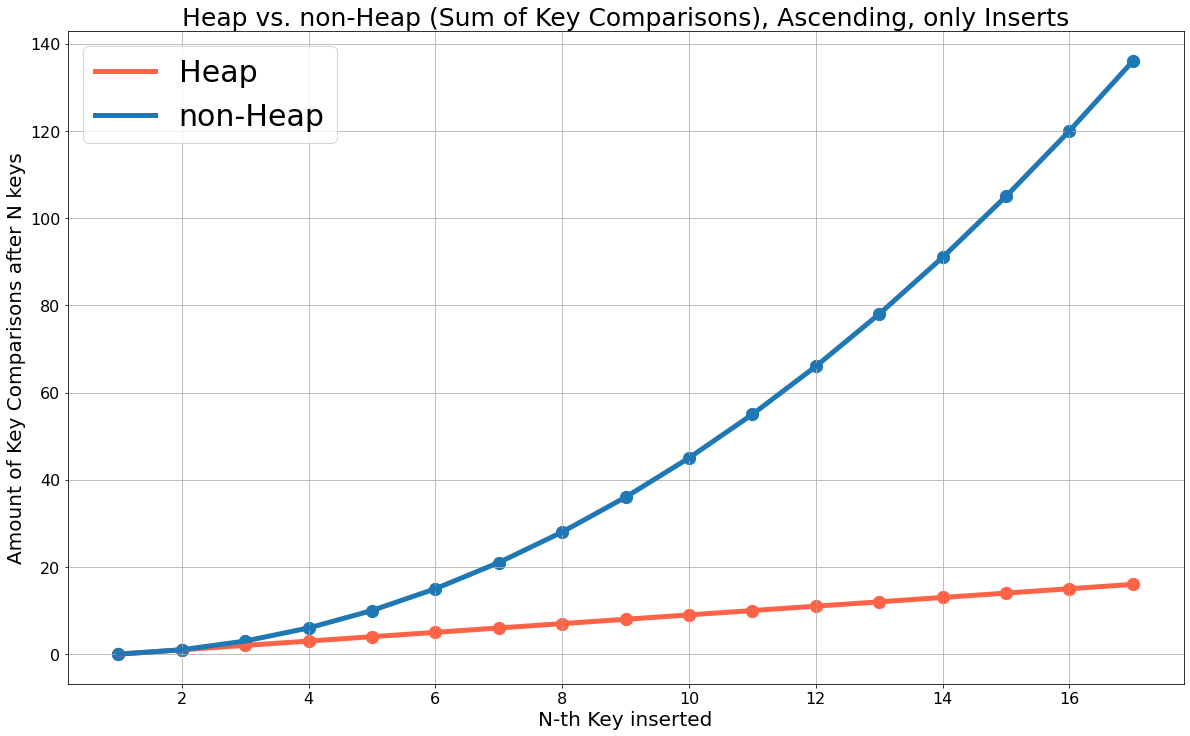

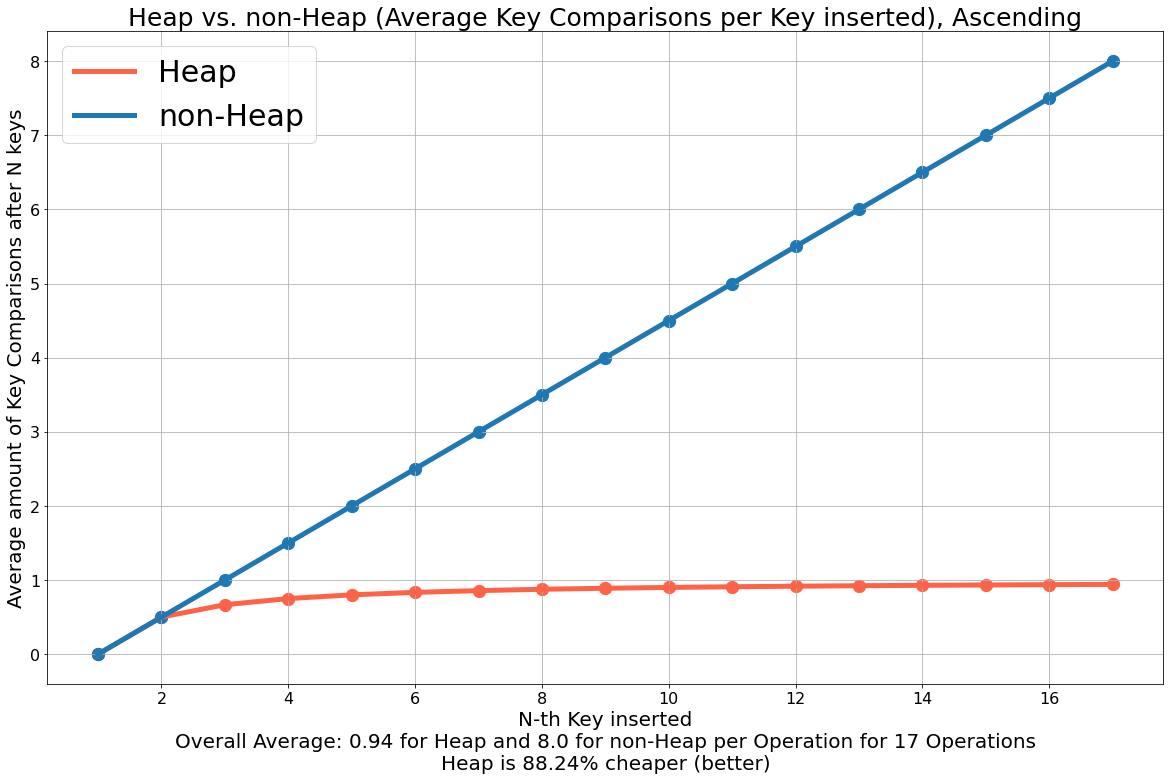

In [12]:
####################
n = 17 # Amount of Elements to be inserted in Ascending Order, feel free to change
####################

insertions = list(range(1, n+1))
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Ascending, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average()
   
labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Ascending", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION, labelstring, overall_average = True)

reset_pq() # Resets Data for next test (ignore)

<font size="6">Best Case for non-Heap Implementation, WC for Heap (Inserting in Descending Order)</font>

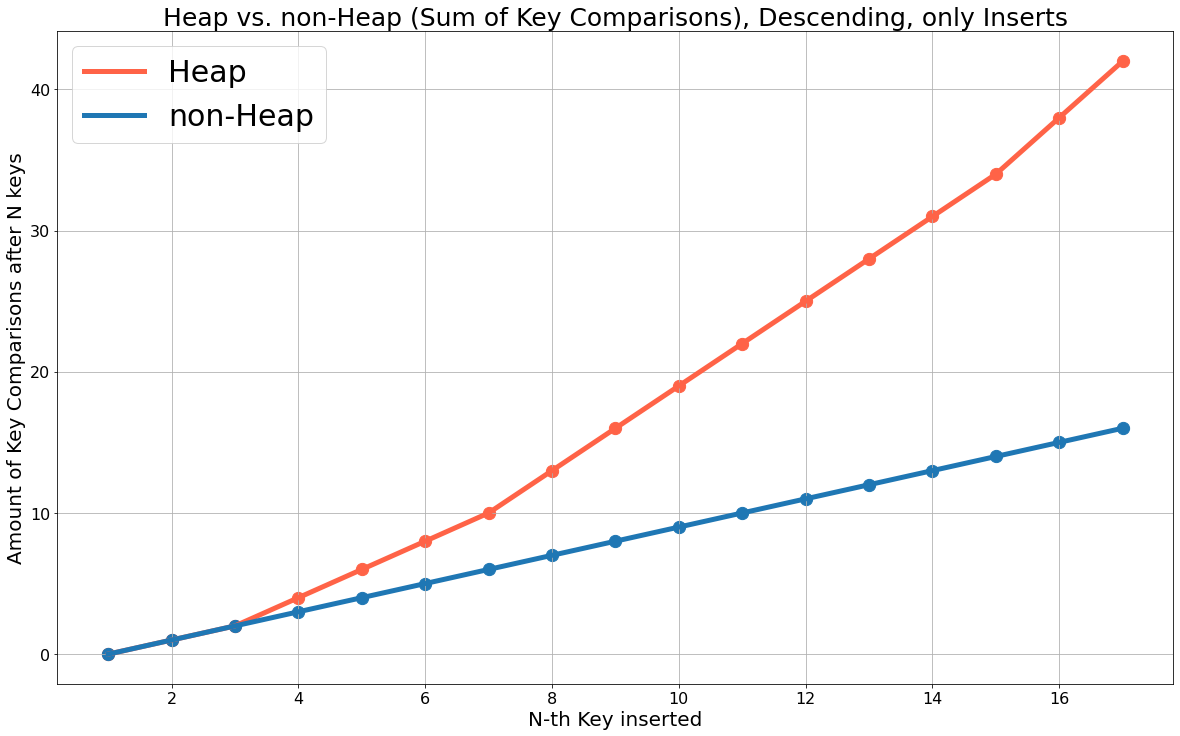

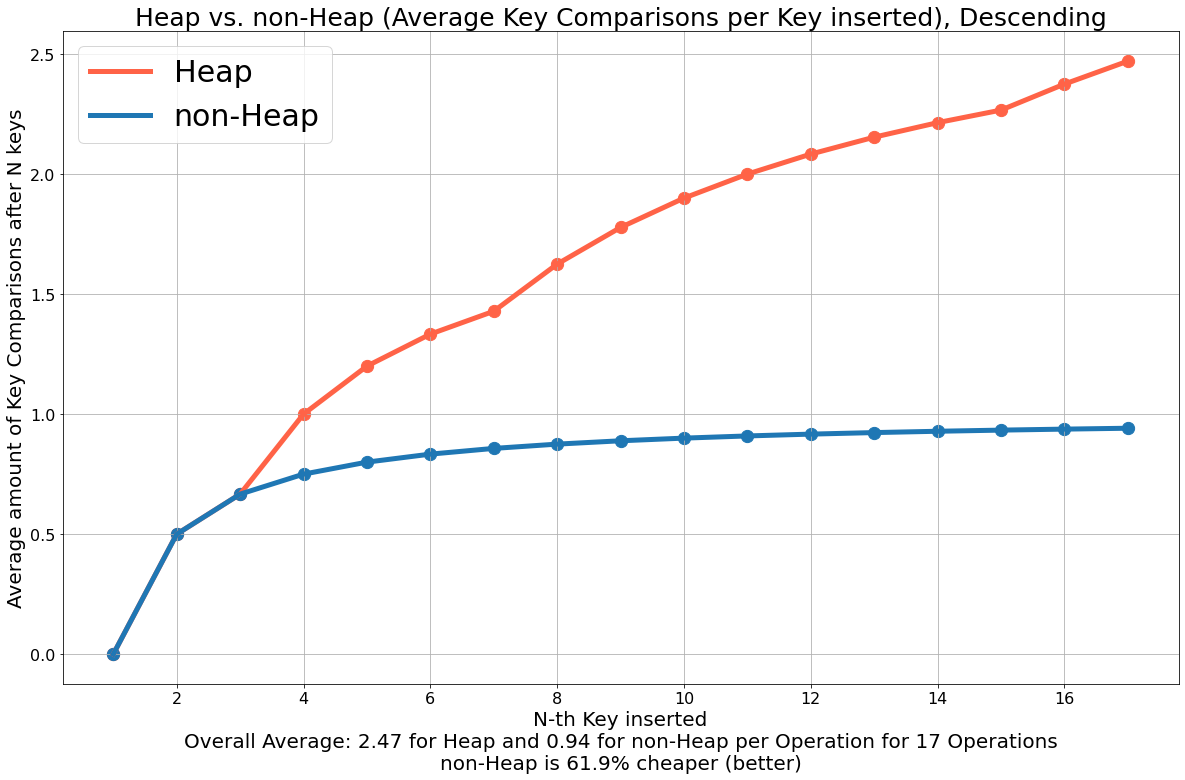

In [13]:
####################
n = 17 # Amount of Elements to be inserted in Descending Order, feel free to change
####################

insertions = list(range(1, n+1))
insertions.reverse()
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))
    
labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Descending, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average()
    
labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Descending", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION, labelstring, overall_average = True)

reset_pq()

<font size="6">"Average Case" simulated with a random Permutation of Numbers 1 through N being inserted</font>

Order of Elements being inserted (Priority): [1, 14, 11, 12, 8, 10, 17, 13, 7, 16, 15, 5, 3, 2, 6, 4, 9]


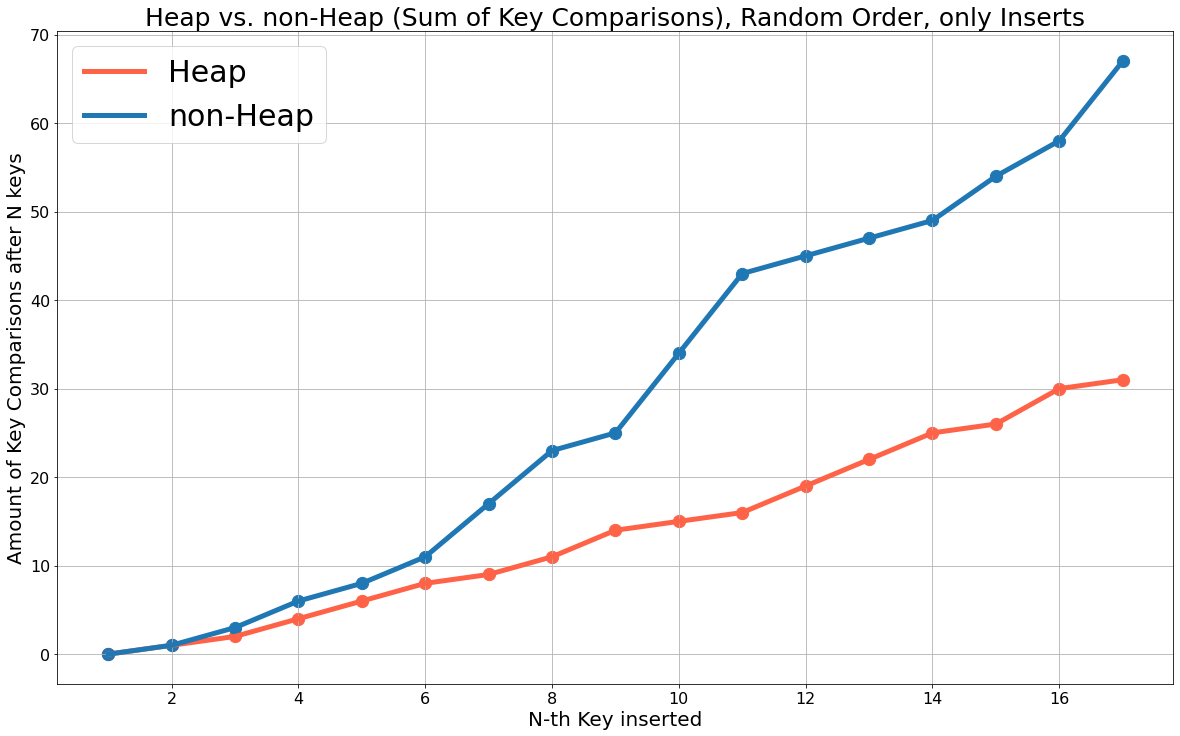

Order of Elements being inserted (Priority): [1, 14, 11, 12, 8, 10, 17, 13, 7, 16, 15, 5, 3, 2, 6, 4, 9]


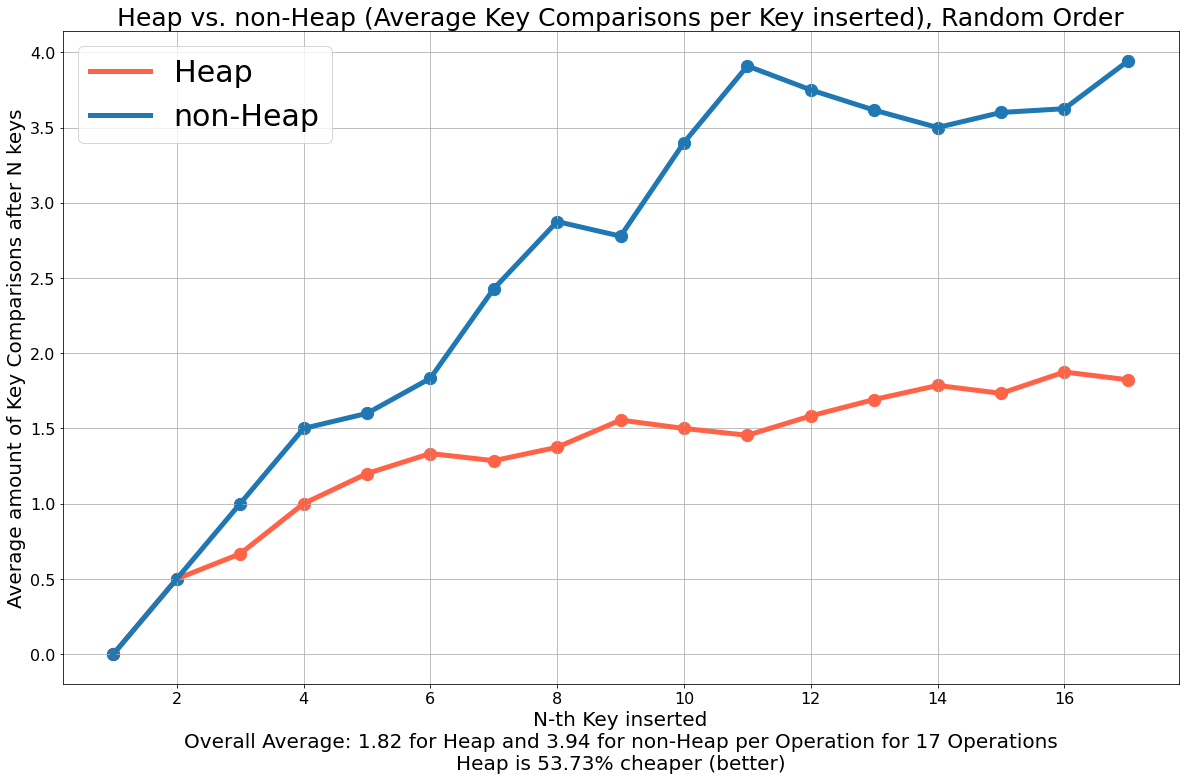

In [14]:
from random import shuffle
####################
n = 17 # amount of numbers to be inserted in random order, feel free to change
####################

insertions = list(range(1, n+1))   
shuffle(insertions) # random Permutation
for j in insertions:
    stat_insert_key(str(j), j)
amt_keys_inserted = list(range(1, len(insertions)+1))
 
print("Order of Elements being inserted (Priority):", insertions)

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Random Order, only Inserts", "N-th Key inserted", "Amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average()
    
print("Order of Elements being inserted (Priority):", insertions)

labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Key inserted), Random Order", "N-th Key inserted", "Average amount of Key Comparisons after N keys"]
visualize(amt_keys_inserted, AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION, labelstring, overall_average = True)

reset_pq()

<font size="6">Function which prevents Underflows caused by Randomness</font>

In [15]:
# e.g "insert-insert-extract" is a legal combination of operations, while its permutation "extract-insert-insert" is not. This Function prevents cases like that and changes the permutation 
# to be a legal. If possible
def make_sure_it_works(operations, amt_inserts, amt_extracts, amt_reductions):
    if amt_extracts > amt_inserts:
        print("\nERROR: Too many Extractions, Underflow!")
        return
    if amt_inserts - amt_extracts < amt_reductions + 1:
        print("\nERROR: Too many Reductions, Underflow!")
        return
    amt_elements = 0
    for index,j in enumerate(operations):
        if j == 0: # If it is an Extraction
            amt_elements -= 1
        elif j != -1: # If it is an Insertion
            amt_elements += 1      
        if amt_elements <= 0:
            swapindex = index
            while swapindex < len(operations)-1:
                swapindex += 1
                if operations[swapindex] != 0 and operations[swapindex] != -1:
                    break
            operations[index], operations[swapindex] = operations[swapindex], operations[index]
            if j == 0:
                amt_elements += 2 # because it prevents an extraction and replaces/swaps places with an insertion
            else:
                amt_elements += 1 # because it swaps a Reduction with an insertion

<font size="6">The same random Permutation as before but including Extract_Min and Reduce_Key</font>

Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction: [15, 2, 0, 14, 0, 7, 0, 11, 13, 4, 3, 10, -1, 1, 8, 12, 9, 5, 6, -1, -1]


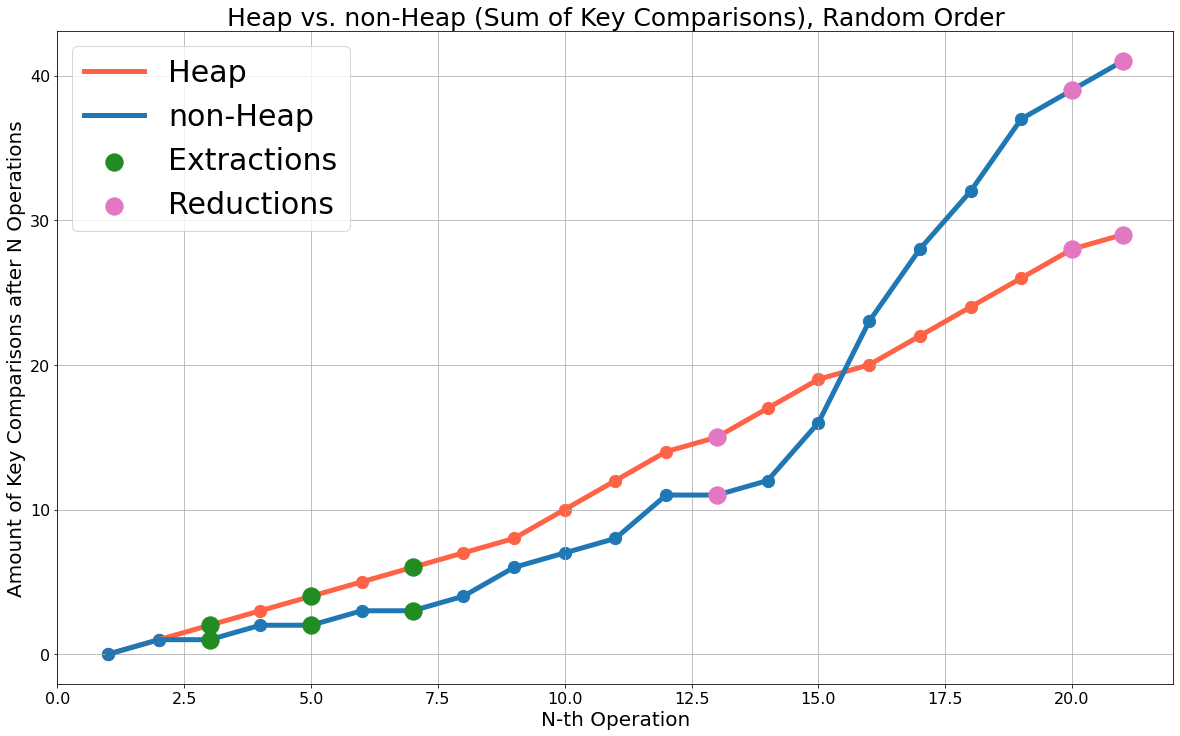

Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction: [15, 2, 0, 14, 0, 7, 0, 11, 13, 4, 3, 10, -1, 1, 8, 12, 9, 5, 6, -1, -1]


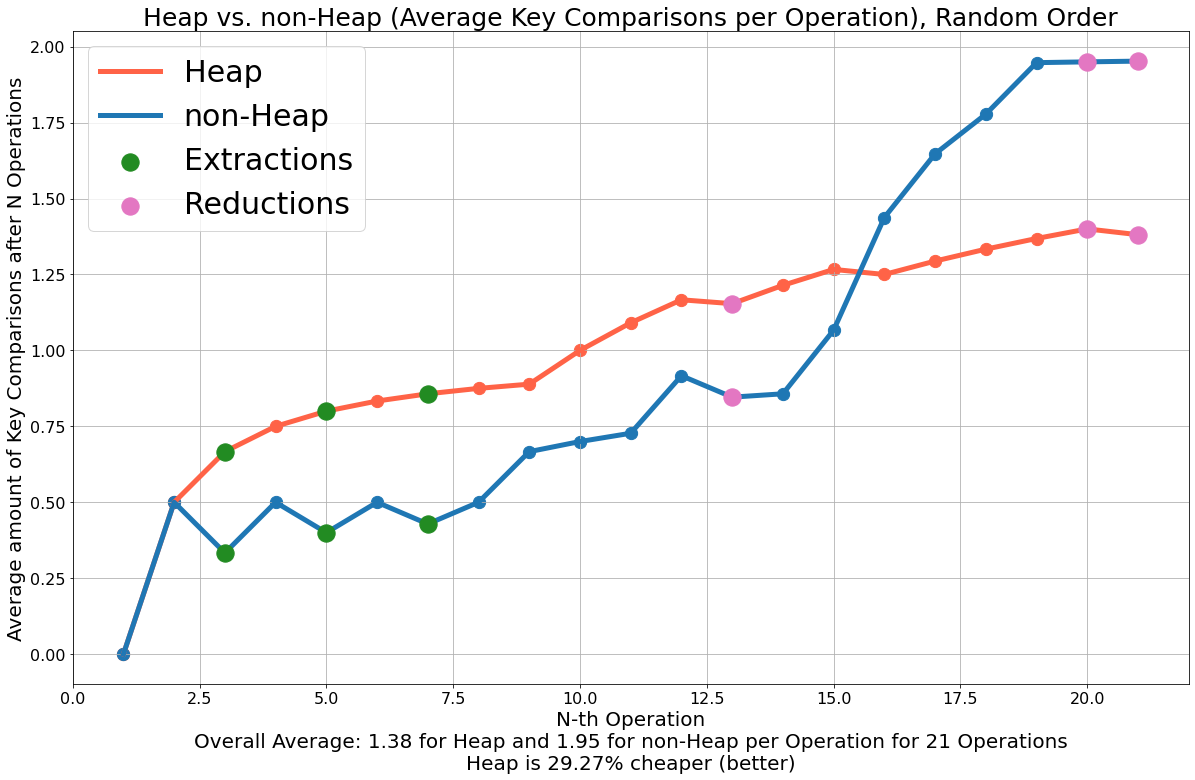

In [16]:
from random import shuffle
####################
n = 15 # amount of Elements to be extracted, feel free to change this aswell as Extractions and Key_Reductions.
extractions = 3 # amount of Extractions. Note that it may not be higher than the amount of Elements inserted
key_reductions = 3 # amount of Key_Reductions (Decrease_Key)
####################

operations = list(range(1, n+1))
for _ in range(1, extractions+1):
    operations.append(0)
for _ in range(1, key_reductions+1):
    operations.append(-1)
shuffle(operations)
make_sure_it_works(operations, n, extractions, key_reductions)
for index,j in enumerate(operations):
    if j == 0:
        stat_extract_min()
        EXTRACTION_INDICES.append(index+1) # for graphical highlighting
    elif j == -1:
        stat_reduce_priority()
        REDUCTION_INDICES.append(index+1)
    else:
        stat_insert_key(str(j), j)
amt_operations = list(range(1, len(operations)+1))
print("Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction:", operations)

labelstrings = ["Heap vs. non-Heap (Sum of Key Comparisons), Random Order", "N-th Operation", "Amount of Key Comparisons after N Operations"]
visualize(amt_operations, KEY_COMPARISONS_PER_OPERATION, NONHEAP_KEY_COMPARISONS_PER_OPERATION, labelstrings)

####################### Above Overall Sum, below Average per Insert

calculate_average()
   
print("Order of Elements being inserted (Priority), 0 for Extraction, -1 for Reduction:", operations)

labelstring = ["Heap vs. non-Heap (Average Key Comparisons per Operation), Random Order", "N-th Operation", "Average amount of Key Comparisons after N Operations"]
visualize(amt_operations, AVG_COMPARISONS_PER_OPERATION, NONHEAP_AVG_COMPARISONS_PER_OPERATION, labelstring, overall_average = True)

reset_pq()